# Data-X Spring 2018: Homework 05

### Linear regression, logistic regression, matplotlib.


In this homework, you will do some exercises with prediction and plotting. 

REMEMBER TO DISLPAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results so we can easily see that you have done it.


# Name: Jeff Peng



# SID: 3034340183

## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file in python. Check if there are any NaN values, and print the results.

Describe data features in terms of type, distribution range (max and min), and mean values. 

Plot feature distributions. This step should give you clues about data sufficiency.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Energy.csv')
print('Number of NaNs in the dataframe:\n',df.isnull().sum())



Number of NaNs in the dataframe:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64


In [72]:
df.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


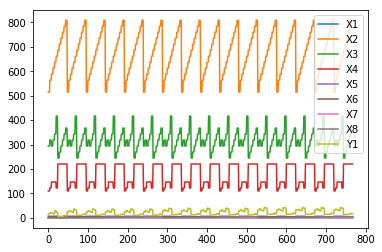

In [73]:
df.plot()

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q 1.2: Train a linear regression model on 80 percent of the given dataset, what is the intercept value and coefficient values.__



In [74]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x=df.iloc[:,0:8]
y=df['Y1']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
df_regression = linear_model.LinearRegression()


df_regression.fit(x_train, y_train)


y_pred = df_regression.predict(x_test)

print('Coefficients: \n', df_regression.coef_)

print ('Intecept: \n', df_regression.intercept_)






Coefficients: 
 [-5.76741267e+01 -5.69155453e-02  3.87621245e-02 -4.78388348e-02
  4.05278793e+00 -2.08927698e-02  1.98098452e+01  1.59651697e-01]
Intecept: 
 74.38301367291967



#### Q.1.3: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 20 percent of unseen data (test error) __ 



In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

training_error= sqrt(mean_squared_error(y_train, df_regression.predict(x_train)))
test_error=sqrt(mean_squared_error(y_test,y_pred))
print('Training error: ',training_error)
print('Test error: ',test_error)

Training error:  2.8557735321990205
Test error:  3.1777219428428536



#### Q1.4: 

Lets us see the effect of amount of data on the performance of prediction model. Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the validation error should be plotted. Comment on the relationship you observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Text(0.5,1,'Test Error and Training Error of Different Number of Samples')

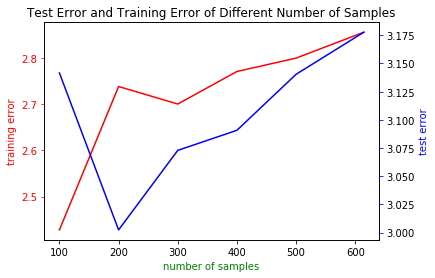

In [80]:
import numpy as np
fig, ax1 = plt.subplots()
ax1.set_xlabel('number of samples', color='green')
ax1.set_ylabel('training error', color='red')
ax2 = ax1.twinx()  
ax2.set_ylabel('test error', color='blue') 
ax1.tick_params('y',colors='red')
ax2.tick_params(axis='y', color='blue')

training_list=[]
test_list=[]

 
for i in range(0,6):
    list_i=[100,200,300,400,500,0.8*len(x)]
    x_train_i, x_test_i, y_train_i, y_test_i = train_test_split(x, y, train_size=list_i[i]/len(x), random_state=0)
    df_reg_i = linear_model.LinearRegression()
    df_reg_i.fit(x_train_i, y_train_i)
    
    y_pred_i= df_reg_i.predict(x_test_i)
    training_error_i=sqrt(mean_squared_error(y_train_i, df_reg_i.predict(x_train_i)))
    training_list.append(training_error_i)
   
  
    test_error_i=sqrt(mean_squared_error(y_test_i,y_pred_i))
    test_list.append(test_error_i)
  
ax1.plot(list_i, training_list,color='red')
ax2.plot(list_i, test_list ,color='blue')
plt.title('Test Error and Training Error of Different Number of Samples')   



## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 2.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.8 : 0.2.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [82]:
custom_bucket=[0,14,28,max(df['Y1'])]

Y= pd.cut(df['Y1'],custom_bucket,labels=[0,1,2])
x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(x, Y, test_size=0.8, random_state=0)

LogModel = linear_model.LogisticRegression()
LogModel.fit(x_train_h, y_train_h)

training_accuracy=LogModel.score(x_train_h,y_train_h)
print ('Training Accuracy:',training_accuracy)

test_accuracy=LogModel.score(x_test_h,y_test_h)
print('Accuracy of the model on unseen test data: ',test_accuracy)

from sklearn.metrics import confusion_matrix
y_true_h = y_test_h
y_pred_h = LogModel.predict(x_test_h)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true_h, y_pred_h),columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)



Training Accuracy: 0.7777777777777778
Accuracy of the model on unseen test data:  0.7642276422764228
Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0          159            8            0
Actual 1           51           77           86
Actual 2            0            0          234


__ Q2.2: 
One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance based classification, SVM or K means or those that involve gradient descent optimization. If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [83]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)


x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_scaled, Y, test_size=0.8, random_state=0)

LogModel_s = linear_model.LogisticRegression()
LogModel_s.fit(x_train_s, y_train_s)

training_accuracy_s=LogModel_s.score(x_train_s,y_train_s)
print ('Training Accuracy:',training_accuracy_s)

test_accuracy_s=LogModel_s.score(x_test_s,y_test_s)
print('Accuracy of the model on unseen test data: ',test_accuracy_s)

from sklearn.metrics import confusion_matrix
y_true_s = y_test_s
y_pred_s = LogModel_s.predict(x_test_s)
ConfusionMatrix_s=pd.DataFrame(confusion_matrix(y_true_s, y_pred_s),columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix_s)

Training Accuracy: 0.8562091503267973
Accuracy of the model on unseen test data:  0.8048780487804879
Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0          155           12            0
Actual 1           26          106           82
Actual 2            0            0          234


## Part 3 - Matplotlib

**Q 3.1a. Create a dataframe called `icecream` that has column `Flavor` with entries `Strawberry`, `Vanilla`, and `Chocolate` and another column with `Price` with entries `3.50`, `3.00`, and `4.25`. **

In [84]:
icecream=pd.DataFrame(data={'Flavor':['Strawberry', 'Vanilla', 'Chocolate'], 'Price': [3.50, 3.00, 4.25]}) 
icecream

,Flavor,Price
0,Strawberry,3.50
1,Vanilla,3.00
2,Chocolate,4.25


**Q 3.1b 
Create a bar chart representing the three flavors and their associated prices.**

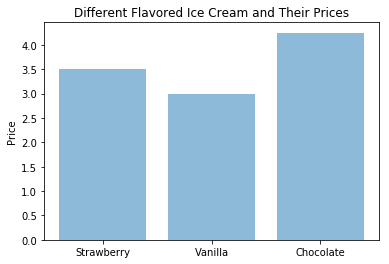

In [86]:
flavors = icecream.iloc[:,0]
x_pos = np.arange(len(flavors))
price = icecream.iloc[:,1]
 
plt.bar(x_pos, price, align='center', alpha=0.5)
plt.xticks(x_pos, flavors)
plt.ylabel('Price')
plt.title('Different Flavored Ice Cream and Their Prices')
 
plt.show()

**Q 3.2   Create 9 random plots (Hint: There is a numpy function for generating random data). The top three should be scatter plots (one with green dots, one with purple crosses, and one with blue triangles. The middle three graphs should be a line graph, a horizontal bar chart, and a histogram. The bottom three graphs should be trignometric functions (one sin, one cosine, one tangent).**

a:  [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
b:  [0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333]


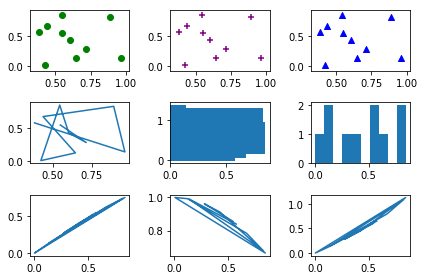

In [87]:
from numpy.random import seed
from numpy.random import rand
from numpy import*
seed(0)
a=rand(10)
seed(100)
b=rand(10)
print('a: ',a)
print('b: ',b)
f = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0))
ax2 = plt.subplot2grid((3,3), (0,1))
ax3 = plt.subplot2grid((3,3), (0,2))
ax4 = plt.subplot2grid((3,3), (1,0))
ax5 = plt.subplot2grid((3,3), (1,1))
ax6 = plt.subplot2grid((3,3), (1,2))
ax7 = plt.subplot2grid((3,3), (2,0))
ax8 = plt.subplot2grid((3,3), (2,1))
ax9 = plt.subplot2grid((3,3), (2,2))

ax1.scatter(a, b, color='green',marker='o')
ax2.scatter(a, b, color='purple', marker='+')
ax3.scatter(a, b, color='blue', marker='^')
ax4.plot(a, b)
ax5.barh(a, b)
ax6.hist(b)
c=sin(b)
ax7.plot(b,c)
d=cos(b)
ax8.plot(b,d)
e=tan(b)
ax9.plot(b,e)

f.tight_layout() 